# UCR Archive

UCR Archive 是一个时间序列分类任务的基准数据集，包含多种领域数据，如传感器数据、生物医学信号、金融数据等。

数据集：[UCR Time Series Classification Archive](https://www.cs.ucr.edu/~eamonn/time_series_data_2018/)

解压密码：someone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import utils

In [2]:
GUN_POINT_DATASET = './data/UCRArchive_2018/GunPointAgeSpan'

## 1. 读取数据

尝试读取 UCR 时间序列分类数据的 GunPoint 数据集。

GunPoint 是一个拔枪动作数据集，它包含两类数据：**拔枪** 和 **指向**。前者记录真实的拔枪动作；后者用手前指，并未拿枪。

![GunPointAgeSpan](./img/GunPointAgeSpan.png)

In [3]:
# 读取 csv 文件
train_path = utils.gen_abspath(GUN_POINT_DATASET, 'GunPointAgeSpan_TRAIN.tsv')
test_path = utils.gen_abspath(GUN_POINT_DATASET, 'GunPointAgeSpan_TEST.tsv')

train_df = utils.read_csv(train_path, header=None, sep='\t')
test_df = utils.read_csv(test_path, header=None, sep='\t')

# 分割特征和标签
X_train = train_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, 0]

train_df

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,253.62452,253.60407,253.56298,253.71716,253.76865,253.52697,253.50000,253.64500,253.73617,...,256.31135,246.87071,237.45856,230.15337,229.09487,231.29132,238.20686,244.92482,249.38493,251.24661
1,1,255.31733,255.75113,255.58757,255.48565,255.63041,256.00793,256.31257,256.29780,256.32982,...,253.66100,255.03936,256.18726,256.51531,257.58037,257.92448,258.44366,258.51316,258.67654,258.41050
2,1,329.29123,330.01502,330.93645,332.61277,337.48827,346.54433,358.24138,371.40032,383.05141,...,303.85829,304.17302,304.66733,305.64402,307.00040,309.74327,313.05452,317.63541,322.55050,326.63763
3,1,322.34806,323.36943,324.86100,327.02559,329.39187,332.29953,337.07454,345.39674,355.71018,...,325.78380,325.92850,325.88444,325.89951,325.69393,325.45631,325.27568,324.84482,324.24534,323.94151
4,1,811.55139,811.36599,811.18394,810.63896,809.62140,807.91435,806.98621,808.27427,815.01132,...,819.12492,818.97725,818.91942,818.85735,818.84962,818.84254,818.85635,818.91863,818.96056,818.96367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2,329.51616,330.33279,330.60289,330.85287,330.83025,330.83829,330.87260,330.80785,330.72676,...,329.66984,329.71076,329.86407,329.85522,329.91318,329.84177,329.73370,329.59696,329.66111,329.66267
131,2,420.28103,424.91246,432.96990,444.09307,458.20788,475.71513,495.87229,518.14554,542.79828,...,417.33070,417.51417,417.41673,417.52180,417.44845,417.56343,417.46648,417.32797,417.24347,417.06210
132,2,410.75099,410.68360,410.60299,410.51410,410.46084,410.45829,410.45154,410.59938,410.85821,...,424.15625,424.26935,424.46739,424.49099,424.51544,424.65142,424.81482,424.85069,424.98601,425.02264
133,2,406.51753,406.91292,407.42704,410.09009,415.45936,424.35324,437.67558,455.70644,478.34640,...,401.66564,401.62227,401.42529,401.27730,401.20830,401.14449,401.09325,401.07195,401.05921,401.02278


## 2. 抽取样本

抽取训练数据中第 `line_num` 行样本特征

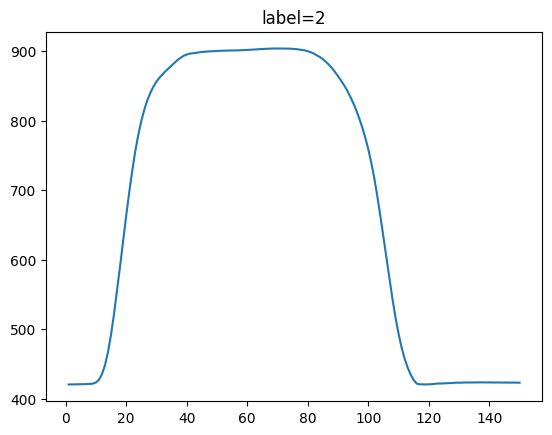

In [4]:
line_num = 90
len_of_df = len(X_train)
assert line_num < len(train_df), f"line_num={line_num} should be less than len_of_df={len_of_df}"

plt.plot(X_train.iloc[line_num])
plt.title(f'label={y_train[line_num]}')
plt.show()